In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from copy import deepcopy
npr = np.random

In [2]:
class Particle():

    def __init__(self, x, y, vx, vy, radius, mass, idx):
        self.x, self.y = x, y
        self.vx, self.vy = vx, vy
        self.radius, self.mass = radius, mass
        self.idx = idx
        
    def update_position(self, Δt):
        self.x += Δt * self.vx
        self.y += Δt * self.vy
        return self

In [3]:
def step_forward(particles, Δt):
    particles_new = [p.update_position(Δt) for p in particles]
    return particles_new

In [116]:
def time_to_wall_collision(z, v, r):
    if v > 0:
        Δt = (1 - r - z) / v
    elif v < 0:
        Δt = (r - z) / v
    else:
        Δt = 1e8
    return Δt

In [132]:
def time_to_particle_particle_collision(p, q):
    Δr = np.array([p.x - q.x, p.y - q.y])
    Δv = np.array([p.vx - q.vx, p.vy - q.vy])
    σ = p.radius - q.radius
    d = np.vdot(Δv, Δr)**2 - np.vdot(Δv, Δv) * (np.vdot(Δr, Δr) - σ**2)
    
    if np.vdot(Δv, Δr) >= 0:
        Δt = np.inf
    elif d < 0:
        Δt = np.inf
    else:
        Δt = -(np.vdot(Δv, Δr) + np.sqrt(d)) / np.vdot(Δv, Δv)
    return Δt

In [134]:
n = 2
particles = [
    Particle(0.5*npr.rand()+0.25, 0.5*npr.rand()+0.25,
             npr.randn(), npr.randn(),
             0.01, 1.0,
             i) for i in range(n)]

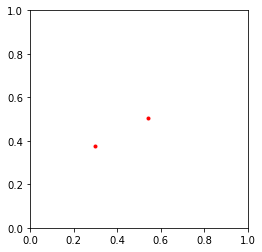

In [135]:
fig, ax = plt.subplots(1, 1)

for p in particles:
    ax.plot(p.x, p.y, "r.")

ax.set(xlim=(0, 1), ylim=(0, 1))
ax.set_aspect("equal")